<a href="https://colab.research.google.com/github/Anitha0511/Clustering/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Live.csv')

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [ ]:
df.shape

(7050, 16)

In [ ]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


1.How many columns contain null data?

In [ ]:
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


2.How many status ids are unique?

In [ ]:
df['status_id'].nunique()

6997

3.How many video post has been made for live selling:

In [ ]:
df['status_type'].value_counts()

,count
status_type,
photo,4288
video,2334
status,365
link,63


4.How many likes have been given to the photo posted on 4/19/2018 at 22:26?

In [ ]:
df.loc[(df['status_published'] == '4/19/2018 22:26') & (df['status_type'] == 'photo')]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
4592,725980084255106_850951205091326,photo,4/19/2018 22:26,383,5,6,379,2,2,0,0,0,NaN,NaN,NaN,NaN


5.How many total shares were made for the video post that was posted on 7/15/2017 at 10:52?

In [ ]:
df.loc[(df["status_published"] == "7/15/2017 10:52") & (df["status_type"] == "video"), "num_shares"].sum()

167

7.What output will the below code give?  colour=['red','blue','green','yellow','cyan']  n=0  for i in range(0,len(colour)):  plt.scatter(X[df['Clusters(5)']==i],Y[df['Clusters(5)']==i],s=10,c=colour[i]) plt.scatter(k.cluster_centers_[:,0] ,k.cluster_centers_[:,1], color='black')
Ans:Gives 5 clusters with midpoints

16.
Perform the following operations on the dataset:
 ● Drop Status id and status published column.
● Use a label encoder to encode the status type column.
● Standardize the data using min-max scalar
 ● Create a K means model for 2 clusters.
 From the above model, what is the inter-cluster variance of the model?

In [ ]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [ ]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,video,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,photo,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,video,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,photo,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,photo,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df['status_type'].unique()

array([3, 1, 0, 2])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])

In [ ]:
df.drop(["Column1","Column2","Column3","Column4"], axis=1, inplace=True)

In [ ]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

#KMeans Model

In [ ]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [ ]:
df_df1 = pd.DataFrame(df_scaled, columns=['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'])

In [ ]:
df_df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmodel = KMeans(n_clusters = 2,random_state=42)
kmodel.fit(df_df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [ ]:
# Inertia represents the inter-cluster variance
inter_cluster_variance = kmodel.inertia_
print(f"Inter-cluster variance (Inertia): {inter_cluster_variance}")


Inter-cluster variance (Inertia): 237.7572640441955


In [32]:
clusters = list(range(2,8))
ssd = []

for num_clusters in clusters:
  model_clus = KMeans(n_clusters = num_clusters,max_iter=150,random_state=50)
  model_clus.fit(df_df1)
  ssd.append(model_clus.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [33]:
ssd

[237.7572640441955,
 161.5963340003365,
 127.31215896781949,
 96.24989550305224,
 82.47515136223939,
 73.25958198497601]

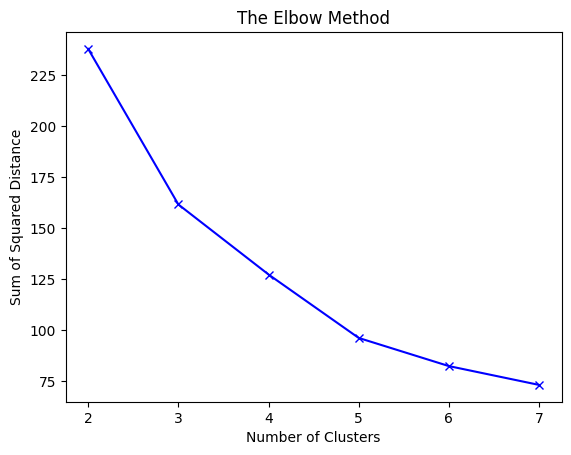

In [34]:
plt.plot(clusters,ssd,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')
plt.show()

The elbow appears around 3 clusters. This suggests that 3 clusters might be the optimal number for the K-Means clustering model. Beyond this point, adding more clusters doesn't significantly improve the clustering.

In [35]:
kmodel = KMeans(n_clusters = 3,max_iter=150,random_state=50)
kmodel.fit(df_df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=150, n_clusters=3, random_state=50)

In [36]:
kmodel.labels_

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [37]:
df["Cluster_Id"] = kmodel.labels_

In [38]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster_Id
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,1
7046,1,16,0,0,14,1,0,1,0,0,1
7047,1,2,0,0,1,1,0,0,0,0,1
7048,1,351,12,22,349,2,0,0,0,0,1


In [39]:
df[df["Cluster_Id"] == 0]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster_Id
0,3,529,512,262,432,92,3,1,1,0,0
2,3,227,236,57,204,21,1,1,0,0,0
6,3,503,614,72,418,70,10,2,0,3,0
7,3,295,453,53,260,32,1,1,0,1,0
15,3,332,100,30,303,23,1,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6991,2,6,0,1,6,0,0,0,0,0,0
6992,3,36,240,20,33,2,1,0,0,0,0
7015,2,63,0,1,62,1,0,0,0,0,0
7016,2,5,0,0,5,0,0,0,0,0,0


In [40]:
df[df["Cluster_Id"] == 1]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster_Id
1,1,150,0,0,150,0,0,0,0,0,1
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,1
5,1,217,6,0,211,5,1,0,0,0,1
8,1,203,1,0,198,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,1
7046,1,16,0,0,14,1,0,1,0,0,1
7047,1,2,0,0,1,1,0,0,0,0,1
7048,1,351,12,22,349,2,0,0,0,0,1


In [41]:
df[df["Cluster_Id"] == 2]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster_Id
166,1,4410,633,257,4315,73,17,5,0,0,2
355,1,1186,37,1,1161,19,6,0,0,0,2
361,2,1043,117,24,984,58,1,0,0,0,2
726,1,1542,18,1260,1520,12,6,0,4,0,2
1010,2,1052,12,7,1052,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
6256,1,1244,218,9,1226,5,12,1,0,0,2
6261,1,2420,75,17,2392,20,8,0,0,0,2
6266,1,1168,104,49,1133,17,17,1,0,0,2
6270,1,1985,39,21,1961,11,12,0,1,0,2


In [42]:
df.Cluster_Id.value_counts(ascending=True)

,count
Cluster_Id,
2,327
0,2584
1,4139


In [43]:
kmodel1 = KMeans(n_clusters = 4,max_iter=150,random_state=50)
kmodel1.fit(df_df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=150, n_clusters=4, random_state=50)

In [44]:
kmodel1.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [45]:
import plotly.express as px

In [46]:
fig = px.scatter_3d(df, x='num_reactions', y='num_comments', z='num_shares',
              color='Cluster_Id')
fig.show()

INSIGHTS:

Interpretation:

The majority of data points (blue) seem to cluster closely in the lower range for all three variables (relatively low numbers of shares, comments, and reactions).
The yellow cluster extends more prominently along the num_comments axis, indicating posts with a higher number of comments but moderate reactions and shares.
The few red points may represent posts with a distinct pattern or higher engagement metrics.